In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)

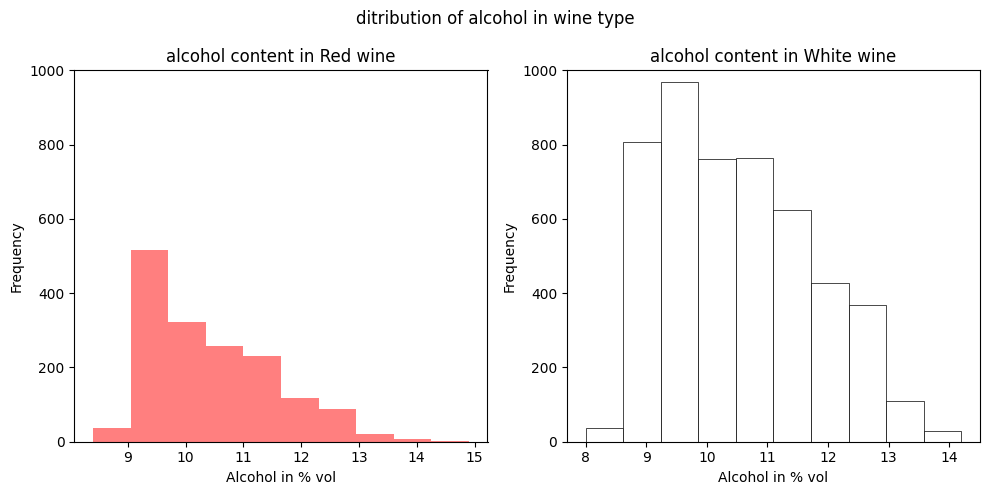

In [5]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(wines[wines["type"]==1].alcohol,bins=10,facecolor="red",alpha=0.5,label="Red Wine")
ax[1].hist(wines[wines["type"]==0].alcohol,bins=10,facecolor="white",edgecolor="black",lw=0.5,label="White Wine")
for a in ax:
    a.set_ylim([0,1000])
    a.set_xlabel("Alcohol in % vol")
    a.set_ylabel("Frequency")
ax[0].set_title("alcohol content in Red wine")
ax[1].set_title("alcohol content in White wine")
fig.suptitle("ditribution of alcohol in wine type")
plt.tight_layout()
plt.show()

In [7]:
X=wines.iloc[:,:-1]
y=wines["type"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.34,random_state=45)
model=Sequential()
model.add(Dense(12,activation="relu",input_dim=12))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=3,batch_size=1,verbose=1)

Epoch 1/3
4288/4288 [==============================] - 12s 3ms/step - loss: 0.5901 - accuracy: 0.7563
Epoch 2/3
4288/4288 [==============================] - 11s 3ms/step - loss: 0.5527 - accuracy: 0.7596
Epoch 3/3
4288/4288 [==============================] - 10s 2ms/step - loss: 0.5518 - accuracy: 0.7596


In [9]:
y_pred=model.predict(X_test)
y_pred_labels=(y_pred>=0.5).astype (int)
for prediction in y_pred_labels[:12]:
    wine_type="Red Wine" if prediction==1 else "White wine"
    print(f"prediction:{wine_type}")

70/70 [==============================] - 1s 6ms/step
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
